In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping 

!conda install -c conda-forge geocoder --yes
print ("install geocoder")
!conda install -c conda-forge/label/gcc7 geocoder --yes
print ("install geocoder2")
!conda install -c conda-forge/label/cf201901 geocoder --yes
print ("install geocoder3")
!conda install -c conda-forge/label/cf202003 geocoder --yes
print ("install geocoder4")
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

  geocoder           conda-forge/noarch::geocoder-1.38.1-py_1
  ratelim            conda-forge/noarch::ratelim-0.1.6-py_2



ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
ins

In [3]:
CLIENT_ID = 'EZH3A5OSNS41XRNOAROZ2OWI2EDRLCSSSIRVNC1J2ZT3BAJZ' # your Foursquare ID
CLIENT_SECRET = 'Z3K3WGPJXEDDWCMQMOZQZA1TCJJDJYYHUD1HJDIAFLR41GUE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EZH3A5OSNS41XRNOAROZ2OWI2EDRLCSSSIRVNC1J2ZT3BAJZ
CLIENT_SECRET:Z3K3WGPJXEDDWCMQMOZQZA1TCJJDJYYHUD1HJDIAFLR41GUE


In [4]:
# Read in the data Covid-19 cases per district (28 May,2020)
df_cases = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Standar%20Kelurahan%20Data%20Corona%20(28%20MEI%202020%20Pukul%2009.00).csv")
# View the top rows of the dataset
df_cases

df_cases.head()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,30704,746,29958,9577,1005,8572,6929,2055,1719,514,2641,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN


In [5]:
df_cases.tail()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
265,3101021002,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
266,3173031008,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
267,3174021001,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
268,3173041001,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN
269,3101021001,3101021001,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU UNTUNG JAWA,20,0,20,0,0,0,0,0,0,0,0,NaN


In [6]:
import pandas as pd
# Read in the data total population in DKI Jakarta 2020
df_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/population2020_DKI_Jakarta.csv")
# View the top rows of the dataset
df_population

,City,Total population 2020(people/km²)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409
5,Kep. Seribu,3334


In [7]:
df_population.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
print ("Total Polulation :", df_population['Total population 2020(people/km²)'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City                               6 non-null      object
 1   Total population 2020(people/km²)  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
Total Polulation : 92736


In [8]:
df_population.head()


,City,Total population 2020(people/km²)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409


In [9]:
# Read in the data 10 most pupulation in DKI Jakarta 2020 per district
df_most_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/10_kelurahan%20terpadat_DKI_Jakarta.csv")
# View the top rows of the dataset
df_most_population

,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343
5,Utan_Panjang,69559
6,Jembatan_Besi,67874
7,Keagungan,67717
8,Kampung_Melayu,66594
9,Karang_Anyar,65141


In [10]:
df_most_population.head()


,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343


In [11]:
# Read in the data Hospital for treatment covid-19
df_hospital = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Hospital%20for%20treatment%20covid-19.csv")
# View the top rows of the dataset
df_hospital

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang
6,RSUD Cengkareng,Jakarta Barat,Cengkareng
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit
9,RS Pelni,Jakarta Barat,Palmerah


In [12]:
df_hospital.head()

,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati


In [15]:
df_cases.columns

Index(['ID_KEL', 'ID_KEL.1', 'Nama_provinsi', 'nama_kota', 'nama_kecamatan',
       'nama_kelurahan', 'ODP', 'Proses Pemantauan', 'Selesai Pemantauan',
       'PDP', 'Masih Dirawat', 'Pulang dan Sehat', 'POSITIF', 'Dirawat',
       'Sembuh', 'Meninggal', 'Self Isolation', 'Keterangan'],
      dtype='object')

In [16]:
df_cases.drop(columns =["ID_KEL","ID_KEL.1", "Nama_provinsi", "nama_kecamatan", "ODP", "Proses Pemantauan", "Selesai Pemantauan", "PDP", "Masih Dirawat", "Pulang dan Sehat", "Dirawat", "Sembuh", "Meninggal", "Self Isolation", "Keterangan"], inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
1,BELUM DIKETAHUI,BELUM DIKETAHUI,539
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,1329
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17


In [17]:
indexNames = df_cases[(df_cases['nama_kelurahan'] == 'BELUM DIKETAHUI') | (df_cases['nama_kota'] == 'LUAR DKI JAKARTA')].index
df_cases.drop(indexNames, inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17
5,JAKARTA BARAT,KEBON JERUK,55
6,JAKARTA UTARA,KELAPA GADING TIMUR,37


In [18]:
df_cases.tail()

,nama_kota,nama_kelurahan,POSITIF
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13
266,JAKARTA BARAT,PINANGSIA,1
267,JAKARTA SELATAN,SETIA BUDI,3
268,JAKARTA BARAT,TAMBORA,2
269,KAB.ADM.KEP.SERIBU,PULAU UNTUNG JAWA,0


In [19]:
# Rename columns name to English
df_cases = df_cases.rename(columns = {'nama_kota':'CITY', 'nama_kelurahan':'DISTRICT', 'POSITIF':'POSITIVE'})
df_cases

,CITY,DISTRICT,POSITIVE
0,NaN,TOTAL,6929
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17
5,JAKARTA BARAT,KEBON JERUK,55
6,JAKARTA UTARA,KELAPA GADING TIMUR,37
...,...,...,...
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13
266,JAKARTA BARAT,PINANGSIA,1
267,JAKARTA SELATAN,SETIA BUDI,3
268,JAKARTA BARAT,TAMBORA,2


In [20]:
# Get the number and the names of each municipality or city in Jakarta
df_cases['CITY'].unique()
print(df_cases['CITY'].unique())
np.array(['JAKARTA TIMUR', 'JAKARTA PUSAT', 'JAKARTA BARAT','JAKARTA SELATAN', 'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU'],dtype=object)
# Get the number of districts (i.e. counts) in Jakarta.
# Get the mean number of positive cases of each district in the city and the standard deviation
df_cases.describe()

[nan 'JAKARTA BARAT' 'JAKARTA SELATAN' 'JAKARTA UTARA' 'JAKARTA TIMUR'
 'JAKARTA PUSAT' 'KAB.ADM.KEP.SERIBU']


,POSITIVE
count,268.000000
mean,44.738806
std,422.522679
min,0.000000
25%,8.000000
50%,15.000000
75%,23.250000
max,6929.000000


In [21]:
df_cases.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
df_cases['POSITIVE'].sum()

print ("positive cases :", ((df_cases['POSITIVE'].sum()) - 6929))

# Group the data by CITY
df_cases_grp = df_cases.groupby(['CITY'])
df_cases_grp

df_cases_grp['POSITIVE'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 269
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CITY      267 non-null    object
 1   DISTRICT  268 non-null    object
 2   POSITIVE  268 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ KB
positive cases : 5061


CITY
JAKARTA BARAT         1122
JAKARTA PUSAT          922
JAKARTA SELATAN        888
JAKARTA TIMUR         1162
JAKARTA UTARA          953
KAB.ADM.KEP.SERIBU      14
Name: POSITIVE, dtype: int64

In [49]:
# Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of Jakarta city and the districts
# Get API key from the service provider (Open Cage Geocode)
!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = '65fb659a7f1b474b899f99a8e1200e5d'
geocoder = OpenCageGeocode(key)
query = 'Jakarta, Indonesia'  
results = geocoder.geocode(query)
# print (results)
# Isolate only the Latitude & Longitude of Jakarta from the Json file
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print ('The Latitude and Longitude of Jakarta is {} and {} reprectively.'.format(lat, lng))

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
The Latitude and Longitude of Jakarta is -6.1753942 and 106.827183 reprectively.


In [50]:
# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df_cases.iterrows(): # iterate over rows in dataframe
    District = row['DISTRICT']       
    query = str(District)+', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_cases['Latitude'] = list_lat   
df_cases['Longitude'] = list_long
df_cases

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.308763,106.897432
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.168293,106.904214
...,...,...,...,...,...
265,KAB.ADM.KEP.SERIBU,PULAU TIDUNG,13,-5.803887,106.525306
266,JAKARTA BARAT,PINANGSIA,1,-6.135969,106.814264
267,JAKARTA SELATAN,SETIA BUDI,3,-6.207319,106.829340
268,JAKARTA BARAT,TAMBORA,2,-6.144766,106.808853


In [51]:
df_cases.head(10)

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.308763,106.897432
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.168293,106.904214
7,JAKARTA BARAT,TOMANG,42,-6.172725,106.797301
8,JAKARTA TIMUR,DUREN SAWIT,39,-6.234138,106.919247
9,JAKARTA BARAT,KALIDERES,41,-6.137006,106.701594
10,JAKARTA SELATAN,PONDOK PINANG,40,-6.275479,106.780403
11,JAKARTA TIMUR,PONDOK KELAPA,52,-6.241040,106.933153


In [52]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_hospital.iterrows(): # iterate over rows in dataframe
    hosp = row['Hospital']
    distr = row['District']       
    query = str(hosp) + ', ' + str(distr) + ', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_hospital['Latitude'] = list2_lat   
df_hospital['Longitude'] = list2_long
df_hospital

,Hospital,City,District,Latitude,Longitude
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok,-6.129834,106.862590
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung,-6.204693,106.884848
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen,-6.173000,106.841800
3,RSUP Fatmawati,Jakarta Selatan,Cilandak,-6.297550,106.783930
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati,-6.234440,106.786670
5,RSAL Mintohardjo,Jakarta Pusat,Tanah Abang,-6.214620,106.845130
6,RSUD Cengkareng,Jakarta Barat,Cengkareng,-6.142970,106.734887
7,RSUD Pasar Minggu,Jakarta Selatan,Pasar Minggu,-6.293560,106.820961
8,RSKD Duren Sawit,Jakarta Timur,Duren Sawit,-6.214620,106.845130
9,RS Pelni,Jakarta Barat,Palmerah,-6.193096,106.803975


In [53]:
# Define the map object and then display using the specified latitude and longitude values
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=12)
map_jkt

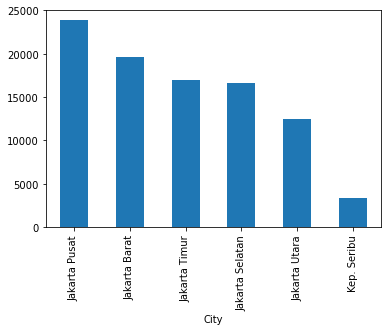

In [54]:
import matplotlib as plt

df_population.set_index('City')['Total population 2020(people/km²)'].plot.bar()

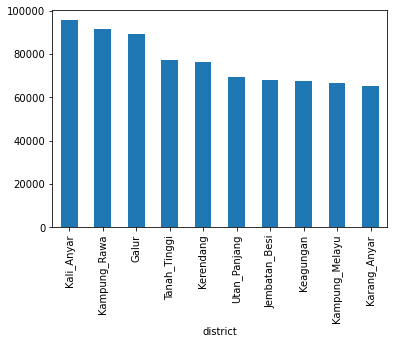

In [55]:
import matplotlib as plt

df_most_population.set_index('district')['Total population 2020 (people/km²)'].plot.bar()

In [56]:
# Construct a map of all districts neighborhood in Jakarta 
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat, lng, label in zip(df_cases['Latitude'], df_cases['Longitude'], df_cases['DISTRICT']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jkt)      
map_jkt

In [57]:
# Plot a map of Covid-19 distribution in the city of Jakarta per May 28, 2020
map_covid_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_jkt)
map_covid_jkt

In [58]:
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
map_hosp = folium.Map(location=[-6.2, 106.8], zoom_start=12)
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_hosp)      
map_hosp

In [59]:
# Plot a combined map of Covid-19 distribution in the city of Jakarta & current available testing centers
map_covid_hosp_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_hosp_jkt)
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_covid_hosp_jkt)      
map_covid_hosp_jkt

In [60]:
prop_neighborhood = pd.DataFrame({
   'Hospital':['RSUD Tarakan']
})
neighborhood_latitude_list = []   # create empty lists for latitude
neighborhood_longitude_list = []  # create empty lists for longitude
for index, row in prop_neighborhood.iterrows(): # iterate over rows in dataframe
    neigh = row['Hospital']  
    query = str(neigh) + ', Jakarta Pusat'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    neighborhood_latitude_list.append(lat)
    neighborhood_longitude_list.append(long)
# create new columns from lists    
prop_neighborhood['Latitude'] = neighborhood_latitude_list   
prop_neighborhood['Longitude'] = neighborhood_longitude_list
prop_neighborhood

,Hospital,Latitude,Longitude
0,RSUD Tarakan,-6.171638,106.810346


In [61]:
# Define function that extracts the category of the venue based on the returned JSON file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
neighborhood_latitude = 0
neighborhood_longitude = 0
address = 'RSUD Tarakan, Jakarta Pusat'
geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
neighborhood_latitude= location.latitude
neighborhood_longitude= location.longitude
print("RSUD Tarakan: ", neighborhood_latitude, ",",neighborhood_longitude)

RSUD Tarakan:  -6.17163765 , 106.81034620548138


In [63]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meter
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
 CLIENT_ID, 
 CLIENT_SECRET, 
 VERSION, 
 neighborhood_latitude, 
 neighborhood_longitude, 
 radius, 
 LIMIT)
# url — not printed for privacy

In [64]:
# Send the GET request and examine the resutls
results = requests.get(url).json()
# results - not printed for shortening of the report

In [65]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877
1,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314
2,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554
3,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930
4,Starbucks,Coffee Shop,-6.175441,106.812220
5,Suan Thai,Thai Restaurant,-6.173744,106.811701
6,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754
7,Petrof Piano,Music Venue,-6.172733,106.811713
8,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802
9,Pondol,Asian Restaurant,-6.176039,106.810050


In [66]:
# Check how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare for {} neighborhood.'.format(nearby_venues.shape[0], prop_neighborhood.iloc[0,0]))

27 venues were returned by Foursquare for RSUD Tarakan neighborhood.


In [67]:
# Sort venues around Tarakan Hospital area
df_tarakan_neigh = nearby_venues.groupby('categories').count()
df_tarakan_neigh.drop(columns =['lat', 'lng'], inplace=True)
df_tarakan_neigh.sort_values(by='name', ascending=False, inplace=True)
df_tarakan_neigh1 = df_tarakan_neigh.iloc[0:14]
df_tarakan_neigh2 = df_tarakan_neigh.iloc[14:]
df_tarakan_neigh1.reset_index()

,categories,name
0,Fast Food Restaurant,4
1,Coffee Shop,3
2,Hotel,3
3,Indonesian Restaurant,3
4,Asian Restaurant,2
5,Convenience Store,2
6,Bookstore,1
7,Breakfast Spot,1
8,Café,1
9,Ice Cream Shop,1


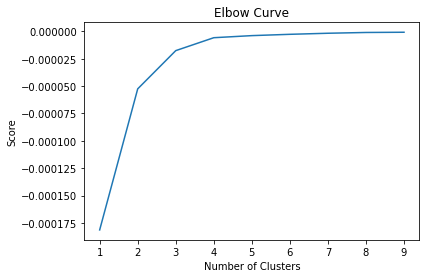

In [68]:
import matplotlib.pyplot as plt
# Apply unsupervised Machine Learning clustering technique to the neighborhood data in Tarakan Hospital
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = nearby_venues[['lat']]
X_axis = nearby_venues[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [69]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(nearby_venues[nearby_venues.columns[2:4]]) # Compute k-means clustering.
nearby_venues['cluster_label'] = kmeans.fit_predict(nearby_venues[nearby_venues.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(nearby_venues[nearby_venues.columns[2:4]]) # Labels of each point
nearby_venues

,name,categories,lat,lng,cluster_label
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877,0
1,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314,1
2,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554,1
3,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930,0
4,Starbucks,Coffee Shop,-6.175441,106.812220,1
5,Suan Thai,Thai Restaurant,-6.173744,106.811701,1
6,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754,1
7,Petrof Piano,Music Venue,-6.172733,106.811713,1
8,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802,1
9,Pondol,Asian Restaurant,-6.176039,106.810050,1


In [70]:
# Check whether all the cluster labels exist in the data
list(nearby_venues['cluster_label'].unique())
[0, 2, 1]

[0, 2, 1]

In [71]:
def regioncolors(counter):
    if counter['cluster_label'] == 0:
        return 'green'
    elif counter['cluster_label'] == 1:
        return 'blue'
    elif counter['cluster_label'] == 2:
        return 'red'
    else:
        return 'error'
nearby_venues["color"] = nearby_venues.apply(regioncolors, axis=1)
nearby_venues

,name,categories,lat,lng,cluster_label,color
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877,0,green
1,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314,1,blue
2,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554,1,blue
3,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930,0,green
4,Starbucks,Coffee Shop,-6.175441,106.812220,1,blue
5,Suan Thai,Thai Restaurant,-6.173744,106.811701,1,blue
6,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754,1,blue
7,Petrof Piano,Music Venue,-6.172733,106.811713,1,blue
8,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802,1,blue
9,Pondol,Asian Restaurant,-6.176039,106.810050,1,blue


In [72]:
# Construct a map of neighborhood venues in Tarakan Hospital, Cetral Jakarta 
map_Tarakan = folium.Map(location=[-6.17163765, 106.81034620548138], zoom_start=16)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Tarakan)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Tarakan)
    
map_Tarakan


In [73]:
# Construct a map of neighborhood venues in Tarakan Hospital, Cetral Jakarta 
map_Redzone = folium.Map(location=[-6.17163765, 106.81034620548138], zoom_start=16)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Redzone)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Redzone)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_Redzone)
    
map_Redzone